In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gmaps
from datetime import datetime
from api_keys import gkey

## Exploration of Data

In [2]:
# Read csv file with taxi ride random sample and create DataFrame
taxi_file = "Resources/DataWithHeaders.csv"
df_taxi = pd.read_csv(taxi_file, index_col=0)
df_taxi.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Community Areas
0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,07a82232d832859a7dcb1c40846bb3e21acb2c84755ef6...,11/16/2013 01:45:00 AM,11/16/2013 01:45:00 AM,480.0,0.15,1.703108e+10,1.703108e+10,8.0,8.0,...,8.05,Cash,NaN,41.907413,-87.640902,POINT (-87.6409015248 41.9074128162),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),37.0
1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,74605d6aa0c8ba08190a5824f79ef27172c59671b00582...,09/28/2016 04:45:00 PM,09/28/2016 04:45:00 PM,420.0,0.00,1.703184e+10,1.703132e+10,32.0,32.0,...,8.75,Credit Card,Blue Ribbon Taxi Association Inc.,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),38.0
2,c2155aedc41a27673cd498d0fea754a18132d7f9,4243ab34318764eb5ca51054af503c610b50579594cef6...,12/10/2013 07:15:00 AM,12/10/2013 07:30:00 AM,720.0,1.80,1.703128e+10,1.703108e+10,28.0,8.0,...,8.44,Cash,NaN,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),29.0
3,c1e860354f05150021e1bdeb7696314ca3e15608,65e345a16c02e0408409d6d71a7a5cb09449e5c84c16d0...,02/27/2014 09:00:00 AM,02/27/2014 09:45:00 AM,2700.0,0.00,1.703108e+10,1.703198e+10,8.0,76.0,...,50.70,Credit Card,Choice Taxi Association,41.902788,-87.626146,POINT (-87.6261455896 41.9027880476),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),37.0
4,bdff93a935333338e6f2f04f778ad7713a36c9ad,8ca267f2246008a052c14ce8c81001149d86916ab274d3...,10/31/2016 04:15:00 PM,10/31/2016 04:15:00 PM,660.0,3.00,NaN,NaN,32.0,35.0,...,13.50,Credit Card,NaN,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.835118,-87.618678,POINT (-87.6186777673 41.8351179863),38.0


In [3]:
# Read csv file with weather API output and create DataFrame
file = "Output/weather.csv"
df_weather = pd.read_csv(file, index_col=0)

# Create columns for Date and Time based on the timestamp in the file
df_weather[['Date', 'Time']] = df_weather['time'].str.split('T', n=1, expand=True)

df_weather.head()

,Trip ID,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed,icon,Date,Time
0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,2013-11-16T01:45:00,Partly Cloudy,0.0000,0.00,43.39,40.05,5.59,partly-cloudy-night,2013-11-16,01:45:00
1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,2016-09-28T04:45:00,Overcast,0.0005,0.14,53.40,53.40,1.25,cloudy,2016-09-28,04:45:00
2,c2155aedc41a27673cd498d0fea754a18132d7f9,2013-12-10T07:15:00,Mostly Cloudy,0.0000,0.00,7.20,-4.92,7.53,partly-cloudy-day,2013-12-10,07:15:00
3,c1e860354f05150021e1bdeb7696314ca3e15608,2014-02-27T09:00:00,Clear,0.0000,0.00,5.96,-5.93,7.04,clear-day,2014-02-27,09:00:00
4,bdff93a935333338e6f2f04f778ad7713a36c9ad,2016-10-31T04:15:00,Clear,0.0000,0.00,43.05,43.05,1.80,clear-night,2016-10-31,04:15:00


In [4]:
# Create a merged dataframe with the Trip ID, time information, and weather data
df_merged = pd.merge(df_weather, df_taxi, on="Trip ID")
df_merged.head()

,Trip ID,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed,icon,Date,...,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Community Areas
0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,2013-11-16T01:45:00,Partly Cloudy,0.0000,0.00,43.39,40.05,5.59,partly-cloudy-night,2013-11-16,...,8.05,Cash,NaN,41.907413,-87.640902,POINT (-87.6409015248 41.9074128162),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),37.0
1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,2016-09-28T04:45:00,Overcast,0.0005,0.14,53.40,53.40,1.25,cloudy,2016-09-28,...,8.75,Credit Card,Blue Ribbon Taxi Association Inc.,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),38.0
2,c2155aedc41a27673cd498d0fea754a18132d7f9,2013-12-10T07:15:00,Mostly Cloudy,0.0000,0.00,7.20,-4.92,7.53,partly-cloudy-day,2013-12-10,...,8.44,Cash,NaN,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),29.0
3,c1e860354f05150021e1bdeb7696314ca3e15608,2014-02-27T09:00:00,Clear,0.0000,0.00,5.96,-5.93,7.04,clear-day,2014-02-27,...,50.70,Credit Card,Choice Taxi Association,41.902788,-87.626146,POINT (-87.6261455896 41.9027880476),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),37.0
4,bdff93a935333338e6f2f04f778ad7713a36c9ad,2016-10-31T04:15:00,Clear,0.0000,0.00,43.05,43.05,1.80,clear-night,2016-10-31,...,13.50,Credit Card,NaN,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.835118,-87.618678,POINT (-87.6186777673 41.8351179863),38.0


In [5]:
# Create a heat map of the number of rides per Community Area
gmaps.configure(api_key=gkey)
locations = df_merged[["Pickup Centroid Latitude", "Pickup Centroid Longitude"]].astype(float)

df_count = df_merged.groupby("Community Areas")["Trip ID"].count()
df_count = pd.DataFrame(df_count)

figure_layout = {"width": "900px",
                 "height": "800px",
                 "border": "1px solid black",
                 "padding": "1px"
                }

figure = gmaps.figure(layout=figure_layout)

heat_layer = gmaps.heatmap_layer(locations, weights=df_merged["Community Areas"], 
                                 dissipating=False, max_intensity=10000,
                                 point_radius = .003)


figure.add_layer(heat_layer)

figure

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='1px', width='900px'))

In [6]:
# Count the total rides in our weather sample
totalrides = len(df_merged)-1
totalrides

8841

## Work with number of rides for different weather data

In [7]:
# Create weather groups and add colunn to DataFrame
di = {'clear-day':'Clear',
      'clear-night':'Clear', 
      'cloudy':'Cloudy', 
      'fog':'Cloudy', 
      'partly-cloudy-day':'Partly Cloudy', 
      'partly-cloudy-night':'Partly Cloudy'}                   

df_merged['Weather Group'] = df_merged['icon'].map(di).fillna(df_merged['icon'].str.capitalize())

# Create columns for month based on the date column
df_merged['Month'] = df_merged['Date'].str.split('-', expand=True)[1]

df_merged.head()

,Trip ID,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed,icon,Date,...,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Community Areas,Weather Group,Month
0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,2013-11-16T01:45:00,Partly Cloudy,0.0000,0.00,43.39,40.05,5.59,partly-cloudy-night,2013-11-16,...,NaN,41.907413,-87.640902,POINT (-87.6409015248 41.9074128162),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),37.0,Partly Cloudy,11
1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,2016-09-28T04:45:00,Overcast,0.0005,0.14,53.40,53.40,1.25,cloudy,2016-09-28,...,Blue Ribbon Taxi Association Inc.,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),38.0,Cloudy,09
2,c2155aedc41a27673cd498d0fea754a18132d7f9,2013-12-10T07:15:00,Mostly Cloudy,0.0000,0.00,7.20,-4.92,7.53,partly-cloudy-day,2013-12-10,...,NaN,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),29.0,Partly Cloudy,12
3,c1e860354f05150021e1bdeb7696314ca3e15608,2014-02-27T09:00:00,Clear,0.0000,0.00,5.96,-5.93,7.04,clear-day,2014-02-27,...,Choice Taxi Association,41.902788,-87.626146,POINT (-87.6261455896 41.9027880476),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),37.0,Clear,02
4,bdff93a935333338e6f2f04f778ad7713a36c9ad,2016-10-31T04:15:00,Clear,0.0000,0.00,43.05,43.05,1.80,clear-night,2016-10-31,...,NaN,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.835118,-87.618678,POINT (-87.6186777673 41.8351179863),38.0,Clear,10


In [8]:
# Count rides per weather group and date
df_WeatherGrouped = df_merged.groupby(['Weather Group','Date'], as_index=False).agg({'Trip ID': 'count',
                                                                                     'precipIntensity': 'mean', 
                                                                                     'precipProbability': 'mean', 
                                                                                     'temperature': 'mean', 
                                                                                     'apparentTemperature': 'mean', 
                                                                                     'windSpeed': 'mean'})
df_WeatherGrouped = df_WeatherGrouped.rename(columns = {'Trip ID':'Ride Count'})
df_WeatherGrouped.head()

,Weather Group,Date,Ride Count,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed
0,Clear,2013-01-01,1,0.0,0.0,20.130000,20.130000,2.750000
1,Clear,2013-01-02,1,0.0,0.0,11.490000,11.490000,2.550000
2,Clear,2013-01-04,7,0.0,0.0,19.184286,10.281429,6.868571
3,Clear,2013-01-05,1,0.0,0.0,22.900000,22.900000,2.670000
4,Clear,2013-01-07,2,0.0,0.0,21.915000,15.160000,5.065000


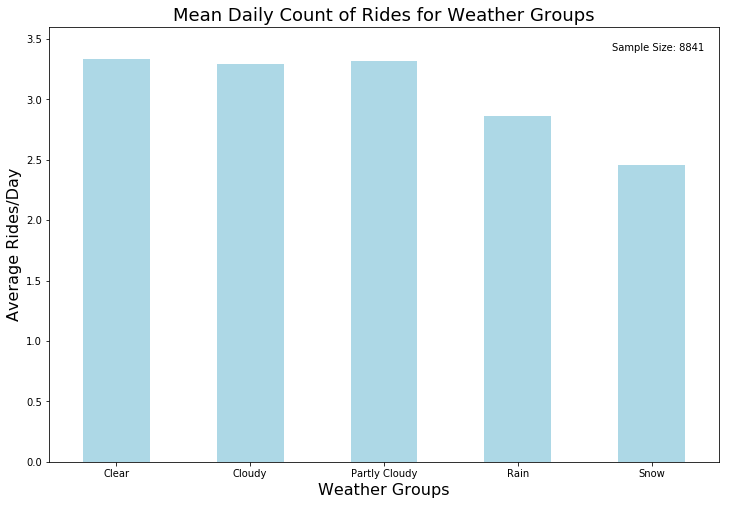

,Weather Group,Average Rides/Day,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed
0,Clear,3.332031,0.000014,0.002103,47.783541,46.482242,2.788297
1,Cloudy,3.295107,0.000276,0.035127,43.312801,40.958697,4.235133
2,Partly Cloudy,3.319271,0.000067,0.008053,52.049260,50.752806,3.627671
3,Rain,2.865471,0.031674,0.707580,55.039343,54.140308,3.919190
4,Snow,2.454545,0.006259,0.469333,33.018848,29.398788,4.839939


In [9]:
# Calculate the average values on a daily basis for each Weather Group to normalize data
df_WeatherSummary = df_WeatherGrouped.groupby('Weather Group', as_index=False).mean()
df_WeatherSummary = df_WeatherSummary.rename(columns = {'Ride Count': 'Average Rides/Day'})

# Create bar chart and save png file
df_WeatherSummary.plot(kind='bar', y = 'Average Rides/Day', x = 'Weather Group', legend=False, rot = 0, 
                       color='lightblue', figsize=(12,8), ylim=(0,3.6))

plt.title('Mean Daily Count of Rides for Weather Groups', fontsize=18)
plt.text(3.7, 3.4, f'Sample Size: {totalrides}')
plt.ylabel('Average Rides/Day', fontsize=16)
plt.xlabel('Weather Groups', fontsize=16)

try: os.mkdir('Images')
except: pass
plt.savefig("Images/Rides-WeatherGroups.png")

plt.show()
df_WeatherSummary

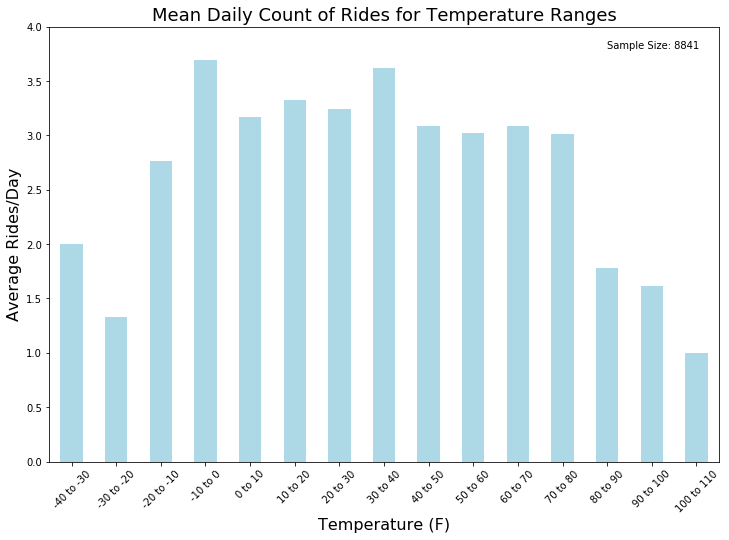

,Average Rides/Day
Temp Range,
-40 to -30,2.000000
-30 to -20,1.333333
-20 to -10,2.764706
-10 to 0,3.693878
0 to 10,3.164948
10 to 20,3.329670
20 to 30,3.245552
30 to 40,3.619048
40 to 50,3.082645


In [10]:
# Create Temperature bins in 10F increments including minimum and maximum temperatures observed
tbins = np.arange(int(min(df_merged['apparentTemperature'])/10-1)*10, 
                  int(max(df_merged['apparentTemperature'])/10+2)*10, 10)

# Create bin labels
tbin_names = [f"{tbins[i]} to {tbins[i+1]}" for i in range(len(tbins)-1)]
    
# Calculate average daily number of rides per temperature bin
df_TempRides = df_merged
df_TempRides['Temp Range'] = pd.cut(df_merged['apparentTemperature'], tbins, labels=tbin_names)
df_TempRides = df_TempRides.groupby(['Temp Range', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_TempRides = df_TempRides.groupby('Temp Range').mean()
df_TempRides = df_TempRides.rename(columns = {'Trip ID':'Average Rides/Day'})

# Create bar chart and save png file
df_TempRides.plot(kind='bar', y = 'Average Rides/Day', legend=False, rot = 45, 
                  color='lightblue', figsize=(12,8), ylim=(0,4))

plt.title('Mean Daily Count of Rides for Temperature Ranges', fontsize=18)
plt.text(12, 3.8, f'Sample Size: {totalrides}')
plt.ylabel('Average Rides/Day', fontsize=16)
plt.xlabel('Temperature (F)', fontsize=16)

try: os.mkdir('Images')
except: pass
plt.savefig("Images/Rides-Temp.png")

plt.show()
df_TempRides

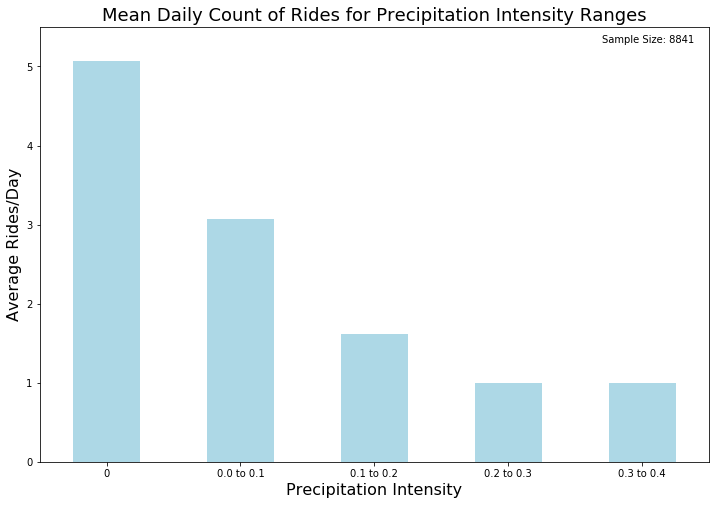

,Average Rides/Day
Precipitation,
0,5.072944
0.0 to 0.1,3.070081
0.1 to 0.2,1.612903
0.2 to 0.3,1.000000
0.3 to 0.4,1.000000


In [11]:
# create precipitation bins and labels
precipitation_bins = np.arange(int(min(df_merged['precipIntensity'])/0.1-1)*0.1, 
                               int(max(df_merged['precipIntensity'])/0.1+2)*0.1, 0.1)
pr_names = [f"{precipitation_bins[i]:.2} to {precipitation_bins[i+1]:.2}" for i in range(len(precipitation_bins)-1)]
pr_names[0]=0

# Calculate average daily number of rides per precipitation bin
df_PreRides = df_merged
df_PreRides['Precipitation'] = pd.cut(df_merged['precipIntensity'], precipitation_bins, labels=pr_names)
df_PreRides = df_PreRides.groupby(['Precipitation', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_PreRides = df_PreRides.groupby('Precipitation').mean()
df_PreRides = df_PreRides.rename(columns = {'Trip ID':'Average Rides/Day'})


# Create bar chart and save png file
df_PreRides.plot(kind='bar', y = 'Average Rides/Day', legend=False, rot = 0, 
                 color='lightblue', figsize=(12,8), ylim=(0,5.5))

plt.title('Mean Daily Count of Rides for Precipitation Intensity Ranges', fontsize=18)
plt.text(3.7, 5.3, f'Sample Size: {totalrides}')
plt.ylabel('Average Rides/Day', fontsize=16)
plt.xlabel('Precipitation Intensity', fontsize=16)

try: os.mkdir('Images')
except: pass
plt.savefig("Images/Rides-Precipitation.png")

plt.show()
df_PreRides

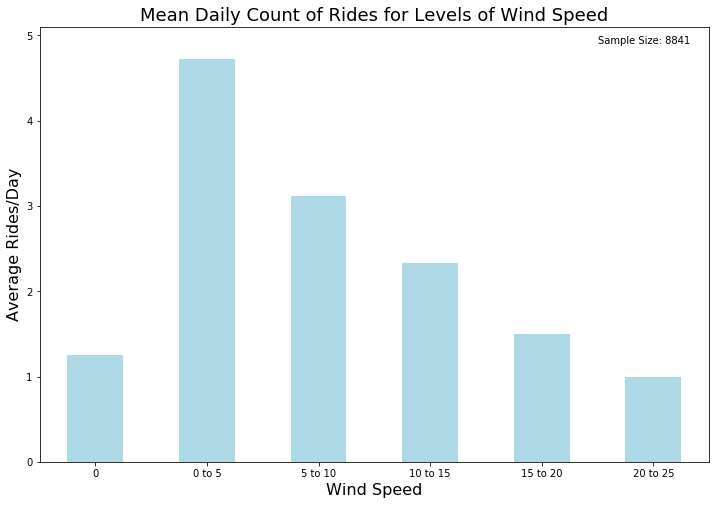

,Average Rides/Day
Winds,
0,1.250000
0 to 5,4.718341
5 to 10,3.118065
10 to 15,2.333333
15 to 20,1.500000
20 to 25,1.000000


In [12]:
# create wind bins and labels
wind_bins = np.arange(int(min(df_merged['windSpeed'])/5-1)*5, 
                      int(max(df_merged['windSpeed'])/5+2)*5, 5)

wind_names = [f"{wind_bins[i]} to {wind_bins[i+1]}" for i in range(len(wind_bins)-1)]
wind_names[0] = 0
    
# Calculate average daily number of rides per wind bin
df_WindRides = df_merged
df_WindRides['Winds'] = pd.cut(df_merged['windSpeed'], wind_bins, labels=wind_names)
df_WindRides = df_WindRides.groupby(['Winds', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_WindRides = df_WindRides.groupby('Winds').mean()
df_WindRides = df_WindRides.rename(columns = {'Trip ID':'Average Rides/Day'})

# Create bar chart and save png file
df_WindRides.plot(kind='bar', y = 'Average Rides/Day', legend=False, rot = 0, 
                  color='lightblue', figsize=(12,8), ylim=(0,5.1))

plt.title('Mean Daily Count of Rides for Levels of Wind Speed', fontsize=18)
plt.text(4.5,4.9, f'Sample Size: {totalrides}')
plt.ylabel('Average Rides/Day', fontsize=16)
plt.xlabel('Wind Speed', fontsize=16)


try: os.mkdir('Images')
except: pass
plt.savefig("Images/Rides-Wind.png")

plt.show()
df_WindRides

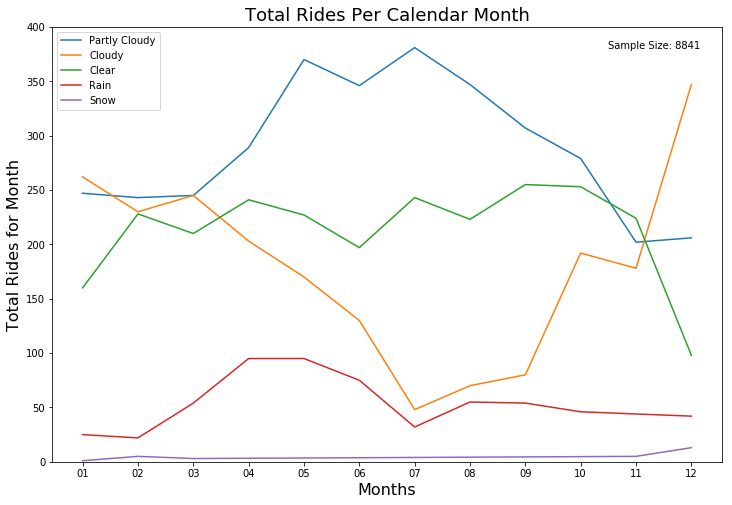

In [13]:
# Calculate total rides per calendar month and plot for different Weather Groups
df_Months = df_merged.groupby(['Weather Group', 'Month']).agg({'Trip ID': 'count'})

# months=df_merged['Month'.unique()
groups=[group for group in df_merged['Weather Group'].unique()]

plt.figure(figsize=(12,8))
                 
for group in groups:
    plt.plot(df_Months.loc[group]['Trip ID'].index, df_Months.loc[group]['Trip ID'])
    
plt.title('Total Rides Per Calendar Month', fontsize=18)
plt.text(9.5,380, f'Sample Size: {totalrides}')
plt.ylabel('Total Rides for Month', fontsize=16)
plt.xlabel('Months', fontsize=16)
plt.legend(groups)
plt.ylim(0,400)
    

plt.savefig("Images/Rides-Months.png")
plt.show()

## Jared's Work

In [14]:
# import master dataframe
file = './output/master_no_grouping.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Trip ID,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed,icon,...,Pickup Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Pickup Centroid Latitude,Pickup Centroid Longitude,day
0,0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,01:45:00,Partly Cloudy,0.0000,0.00,43.39,40.05,5.59,partly-cloudy-night,...,8.0,7.05,0.00,0.0,1.0,8.05,Cash,41.907413,-87.640902,2013-11-16
1,1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,04:45:00,Overcast,0.0005,0.14,53.40,53.40,1.25,cloudy,...,32.0,6.75,2.00,0.0,0.0,8.75,Credit Card,41.880994,-87.632746,2016-09-28
2,2,c2155aedc41a27673cd498d0fea754a18132d7f9,07:15:00,Mostly Cloudy,0.0000,0.00,7.20,-4.92,7.53,partly-cloudy-day,...,28.0,8.44,0.00,0.0,0.0,8.44,Cash,41.879255,-87.642649,2013-12-10
3,3,c1e860354f05150021e1bdeb7696314ca3e15608,09:00:00,Clear,0.0000,0.00,5.96,-5.93,7.04,clear-day,...,8.0,39.25,8.45,0.0,3.0,50.70,Credit Card,41.902788,-87.626146,2014-02-27
4,4,bdff93a935333338e6f2f04f778ad7713a36c9ad,04:15:00,Clear,0.0000,0.00,43.05,43.05,1.80,clear-night,...,32.0,11.00,2.00,0.0,0.0,13.50,Credit Card,41.878866,-87.625192,2016-10-31


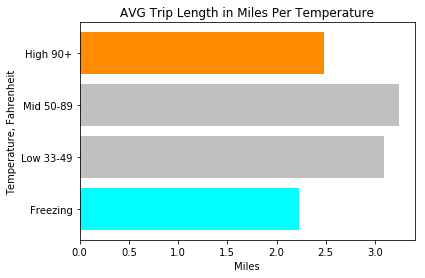

In [15]:
# combine icons so there are less weather categories
df.loc[:, 'icon'].replace(['clear-night', 'fog', 'partly-cloudy-day'], ['clear-day', 'cloudy', 'partly-cloudy-night'], inplace=True)
df.loc[:, 'icon'].replace(['clear-day', 'cloudy', 'partly-cloudy-night'], ['clear','cloudy', 'partly cloudy'], inplace=True)

# make a copy of master dataframe
df1 = df.copy()

# create new column to hold temp range
df1["temp range"] = ""

# compare apparentTemperature value to temp category values and place them in the newly created 'temp range' column
(df1.loc[df1['apparentTemperature'] > 89, ['temp range']]) = 'High 90+'
(df1.loc[(90 > df1['apparentTemperature']) & (df1['temperature'] > 49), ['temp range']]) = 'Mid 50-89'
(df1.loc[(50 > df1['apparentTemperature']) & (df1['temperature']> 32), ['temp range']]) = 'Low 33-49'
(df1.loc[df1['apparentTemperature'] < 33, ['temp range']]) = 'Freezing'

# group by 'temp range' and aggreagte appropriate columns
df1 = df1.groupby(['temp range']).agg({'Trip ID': 'count', 'precipIntensity': 'mean', 'precipProbability': 'mean', 'temperature': 'mean', 'apparentTemperature': 'mean', 'windSpeed': 'mean', 'Trip Seconds': 'mean', 'Trip Miles': 'mean', 'Fare': 'mean', 'Trip Total': 'mean'})
df1.head

# here I couldn't figure out how to rearrange the rows so I exported to .csv and manually did it
file = './output/groupby_high_mid_low_freezing.csv'
df1 = pd.read_csv(file)
df1.head

# create variables for average miles per temperature category
high_miles = df1['Trip Miles'][0]
mid_miles = df1['Trip Miles'][1]
low_miles = df1['Trip Miles'][2]
freezing_miles = df1['Trip Miles'][3]

# create the height of the graph based on average miles
height = [high_miles, mid_miles, low_miles, freezing_miles]

# create variables for temperature categories
high_range = df1['temp range'][0]
mid_range = df1['temp range'][1]
low_range = df1['temp range'][2]
freezing_range = df1['temp range'][3]

bars = (freezing_range, low_range, mid_range, high_range)
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height, color=['cyan', 'silver', 'silver', 'darkorange'])
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

# create labels
plt.xlabel('Miles')
plt.ylabel('Temperature, Fahrenheit')
plt.title('AVG Trip Length in Miles Per Temperature')
 
# plt.savefig("../Images/js_miles_per_temp.png", bbox_inches = "tight")    
# show graphic
plt.show()

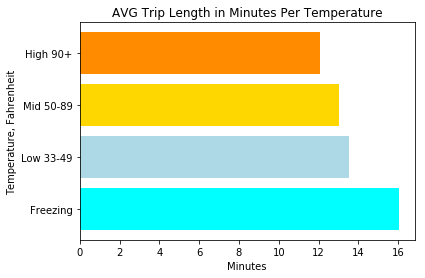

In [16]:
# copy df1 to df2
df2 = df1.copy()

# convert seconds to minutes
df2['Trip Minutes'] = df2['Trip Seconds'] / 60

# create variables for average trip length in minutes per temperature category
high_Minutes = df2['Trip Minutes'][0]
mid_Minutes = df2['Trip Minutes'][1]
low_Minutes = df2['Trip Minutes'][2]
freezing_Minutes = df2['Trip Minutes'][3]

# create the height of the graph based on average miles
height = [high_Minutes, mid_Minutes, low_Minutes, freezing_Minutes]

# create variables for temperature categories
high_range = df2['temp range'][0]
mid_range = df2['temp range'][1]
low_range = df2['temp range'][2]
freezing_range = df2['temp range'][3]

bars = (freezing_range, low_range, mid_range, high_range)
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height, color=['cyan', 'lightblue', 'gold', 'darkorange'])
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

# create labels
plt.xlabel('Minutes')
plt.ylabel('Temperature, Fahrenheit')
plt.title('AVG Trip Length in Minutes Per Temperature')
 
# plt.savefig("../Images/js_minutes_per_temp.png", bbox_inches = "tight")   
# Show graphic
plt.show()

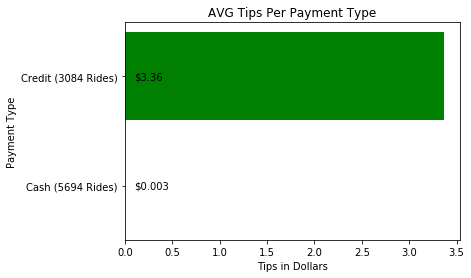

In [17]:
# groupby newly created weather icons
df10 = df.groupby(['Payment Type'], as_index=False).agg({'Tips': 'mean', 'Trip ID': 'count', 'Trip Seconds': 'mean', 'Trip Miles': 'mean', 'Trip Total': 'mean'})
df10.head()

# create variables for average tips per payment type plot
cash_tips = df10['Tips'][0]
credit_tips = df10['Tips'][1]
height = [cash_tips, credit_tips]
bars = ('Cash (5694 Rides)', 'Credit (3084 Rides)')
y_pos = np.arange(len(bars))
 
# create horizontal bars
plt.barh(y_pos, height, color=['green'])
 
# label
plt.ylabel('Payment Type')
plt.yticks(y_pos, bars)
plt.xlabel('Tips in Dollars')
plt.title('AVG Tips Per Payment Type')

# create floating text
plt.text(.1, .97, '${:,.2f}'.format(df10['Tips'][1]))
plt.text(.1, -.025, '${:,.3f}'.format(df10['Tips'][0]))

# plt.savefig("../Images/js_avg_tips_per_ride.png", bbox_inches = "tight")   
# Show graphic
plt.show()

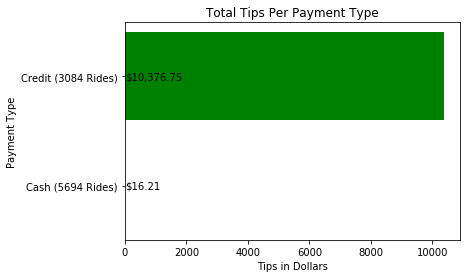

In [18]:
# groupby newly created weather icons
df11 = df.groupby(['Payment Type'], as_index=False).agg({'Tips': 'sum', 'Trip ID': 'count', 'Trip Seconds': 'mean', 'Trip Miles': 'mean', 'Trip Total': 'mean'})
df11.head()

# create variables for average tips per payment type plot
cash_tips = df11['Tips'][0]
credit_tips = df11['Tips'][1]
height = [cash_tips, credit_tips]
bars = ('Cash (5694 Rides)', 'Credit (3084 Rides)')
y_pos = np.arange(len(bars))
 
# create horizontal bars
plt.barh(y_pos, height, color=['green'])
 
# label
plt.ylabel('Payment Type')
plt.yticks(y_pos, bars)
plt.xlabel('Tips in Dollars')
plt.title('Total Tips Per Payment Type')

# create floating text
plt.text(-1, .97, '${:,.2f}'.format(df11['Tips'][1]))
plt.text(-1, -.025, '${:,.2f}'.format(df11['Tips'][0]))

# plt.savefig("../Images/js_total_tips_per_ride.png", bbox_inches = "tight")  
# Show graphic
plt.show()

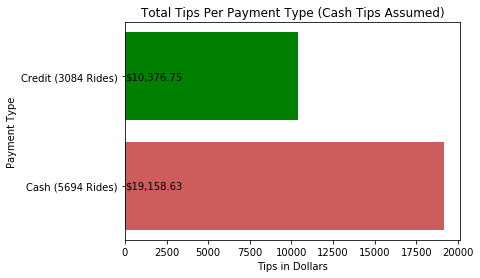

In [19]:
# calculate loss of reported income
income = df10['Trip ID'][0] * df10['Tips'][1]
income

# groupby newly created weather icons
df11 = df.groupby(['Payment Type'], as_index=False).agg({'Tips': 'sum', 'Trip ID': 'count', 'Trip Seconds': 'mean', 'Trip Miles': 'mean', 'Trip Total': 'mean'})
df11.head()

# create variables for average tips per payment type plot
cash_tips = income
credit_tips = df11['Tips'][1]
height = [cash_tips, credit_tips]
bars = ('Cash (5694 Rides)', 'Credit (3084 Rides)')
y_pos = np.arange(len(bars))
 
# create horizontal bars
plt.barh(y_pos, height, color=['indianred', 'green'])
 
# label
plt.ylabel('Payment Type')
plt.yticks(y_pos, bars)
plt.xlabel('Tips in Dollars')
plt.title('Total Tips Per Payment Type (Cash Tips Assumed)')

# create floating text
plt.text(-1, .97, '${:,.2f}'.format(df11['Tips'][1]))
plt.text(-1, -.025, '${:,.2f}'.format(income))
 
# plt.savefig("../Images/js_adjusted_tips_per_ride.png", bbox_inches = "tight")
# Show graphic
plt.show()

## Summary of Findings
Our main hypothesis was that there is a positive correlation between inclement weather and the popularity of taxis. Based on th e analysis we conducted, this hypothesis was dead wrong – more trips on days with good weather than those with bad weather.

Possible reasons for this could be:
- People going out more on clear days?
- Public transit faster than cabs in bad weather?
- Better moods in good weather?

Additional questions were:
- Do trip lengths get affected by weather?
    - It appears that the lowest the temperature the longer the trip in minutes. This is reasonable considering slow moving traffic with bad weather
- Does weather decrease or increase the average length of trips taken?
    - It seems that the trip lenght in miles is shorter for the very high and very low temperatures.